In [1]:
import numpy as np
import matplotlib.pyplot as plt
from est_MI import est_MI_JVHW, est_MI_MLE
from test_entro import entropy_true, validate_dist, randsmpl
%matplotlib inline

def MI_true(pxy):
    """computes mutual information I(X;Y) given the joint distribution

    Input:
    ----- pxy: Sx-by-Sy matrix capturing the joint probability masses of the
               the bivariate RVs (X,Y), where Sx and Sy are the support size
               of X and Y, respectively. The (i,j)-th entry of pxy denotes
               the joint probability Pr(X = i,Y = j).

    Output:
    ----- MI: the mutual information I(X;Y), which is a scaler.
    """
    flat_pxy = pxy.flatten()
    validate_dist(flat_pxy)

    px = pxy.sum(axis=0)
    py = pxy.sum(axis=1)
    return entropy_true(px) + entropy_true(py) - entropy_true(flat_pxy)

In [4]:
import numpy as np
import itertools
import pandas as pd
import networkx as nx
a = pd.read_csv('alarm10K.csv')
index_array = np.arange(0,len(a.columns))
Info_Graph = nx.Graph()
for comb in list(itertools.combinations(index_array, 2)):
    S_x = len(set(a[a.columns[comb[0]]]))
    S_y = len(set(a[a.columns[comb[1]]]))
    pxy = np.zeros((S_x,S_y))
    N = a.shape[0]    
    list_x = list(set(a[a.columns[comb[0]]]))
    list_y = list(set(a[a.columns[comb[1]]]))
    
    dict_x = {}
    for i in range(S_x):
        dict_x[list_x[i]] = i
        
    dict_y = {}
    for i in range(S_y):
        dict_y[list_y[i]] = i
            
    for ele in list(itertools.product(np.arange(0,S_x),np.arange(0,S_y))):
        truth = np.concatenate((np.expand_dims(a[a.columns[comb[0]]],1),np.expand_dims(a[a.columns[comb[1]]],1)),1)
        temp = (truth == np.array([list_x[ele[0]],list_y[ele[1]]],dtype=object))
        pxy[ele[0],ele[1]] = np.sum((np.sum(temp,axis=1)==2))/N
    I = 0
    for point in truth:
        I += pxy[dict_x[point[0]],dict_y[point[1]]]/(np.sum(pxy[dict_x[point[0]],:])*np.sum(pxy[:,dict_y[point[1]]]))
    Info_Graph_plugin.add_edge(comb[0],comb[1],weight = I)
    Info_Graph_jvhw.add_edge(comb[0],comb[1],weight = MI_true(pxy))

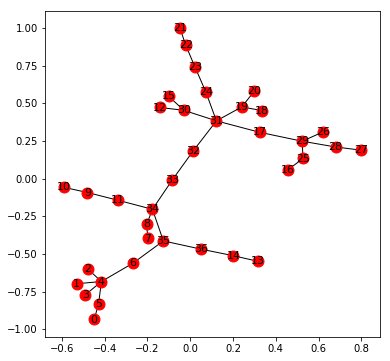

In [57]:
from networkx.algorithms import tree
edges = tree.maximum_spanning_edges(Info_Graph_jvhw, algorithm='kruskal', data=False)
Gc = nx.Graph()
Gc.add_edges_from(edges)
plt.figure(figsize = (6,6))
edge_labels = nx.draw_networkx(Gc, pos=nx.spring_layout(Gc), with_labels =  True , node_size= 120 , font_size=11)

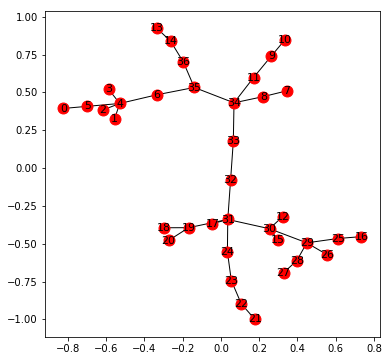

In [92]:
edges = tree.maximum_spanning_edges(Info_Graph_plugin, algorithm='kruskal', data=False)
Gc = nx.Graph()
Gc.add_edges_from(edges)
plt.figure(figsize = (6,6))
edge_labels = nx.draw_networkx(Gc, pos=nx.spring_layout(Gc), with_labels =  True , node_size= 120 , font_size=11)